# 3. Explore the data & using data to answer meaningful Question (EDA)

In [1]:
# import library
import pandas as pd
from datetime import datetime
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots

### First, let's read our data and take a quick view

In [2]:
data = pd.read_csv('data\cleaned_data_edited.csv')
data.head(5)

,CARNAME,ID,Make,Model,Body color,Interior color,Interior material,Body,Doors,Seats,...,CO2 emissions(g/km),Emission class,Mileage(km),First registration,Condition,Consumption(l/100km or kWh/100km),Price(EUR),Tags,Engine capacity(ccm),Previous owners
0,hyundai kona,61032325,Hyundai,Kona,Grey,Black interior,Full leather interior,SUV / offroad,4/5 doors,5.0,...,0,No emission class,10,9/2023,New,0.0,53099,Ventilated front seats; Heated rear seats; Par...,1499.0,0.0
1,volkswagen up!,61032250,Volkswagen,up!,Black,Other interior color,Cloth interior,Hatchback,4/5 doors,4.0,...,112,Euro 6d,35,9/2023,New,5.5,27749,Heated front seats; Bluetooth; Automatic A/C; ...,999.0,0.0
2,seat ibiza,61032203,Seat,Ibiza,Black,Grey interior,Cloth interior,Hatchback,4/5 doors,5.0,...,110,Euro 6,2855,6/2023,Demonstration car,4.8,27549,LED headlights; Digital cockpit; Keyless entry...,999.0,0.0
3,ford kuga,61032104,Ford,Kuga,Silver,Black interior,Cloth interior,SUV / offroad,4/5 doors,5.0,...,125,Euro 6d,8,4/2023,New,6.6,37249,Heated rear seats; LED headlights; Digital coc...,1496.0,1.0
4,dodge nitro,61032099,Dodge,Nitro,White,Black interior,Full leather interior,SUV / offroad,4/5 doors,5.0,...,288,Euro 4,158863,4/2011,Used,12.1,14799,Electric adjustable front seats; Heated front ...,3952.0,2.0


- Check Dtype of columns

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2289 entries, 0 to 2288
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   CARNAME                            2289 non-null   object 
 1   ID                                 2289 non-null   int64  
 2   Make                               2289 non-null   object 
 3   Model                              2289 non-null   object 
 4   Body color                         2289 non-null   object 
 5   Interior color                     2289 non-null   object 
 6   Interior material                  2289 non-null   object 
 7   Body                               2289 non-null   object 
 8   Doors                              2289 non-null   object 
 9   Seats                              2289 non-null   float64
 10  Fuel                               2289 non-null   object 
 11  Transmission                       2289 non-null   objec

# 3.1 Exploratory data analysis: Analyze, identify patterns, and explore the data.

## 3.1.1 Numerical analysis using descriptive statistics

Descriptive statistics show the characteristics of numerical features. It shows us the information such as:
- The mean (and you can go further with advanced techiques as Arithmetic mean, Geometric mean, Harmonic mean)
- The median
- The mode
- Quantiles (Quartiles, Percentiles, Deciles, Crocodiles?)
- Range and IQR (Interquartile Range) (you might find that its relation to box plots)


In [4]:
# Tạo bản sao của clean_df
df_copy = data.copy()
# # Chỉ giữ lại các cột có kiểu dữ liệu là int hoặc float
df_copy = df_copy.select_dtypes(include=['int64', 'float64'])
# Because dtype of "ID" is int, but this column is meaningless, so i also drop it.
df_copy = df_copy.drop(['ID'], axis=1)


df_analyze = df_copy.describe()
# Tính IQR
Q1 = df_copy.quantile(0.25)
Q3 = df_copy.quantile(0.75)
IQR = Q3 - Q1

# Thêm IQR vào cuối df_analyze
df_analyze.loc['IQR'] = IQR

df_analyze

,Seats,Power(kW),CO2 emissions(g/km),Mileage(km),Consumption(l/100km or kWh/100km),Price(EUR),Engine capacity(ccm),Previous owners
count,2289.000000,2289.000000,2289.000000,2289.000000,2289.000000,2289.000000,2289.000000,2289.000000
mean,4.905199,131.533421,108.456968,37874.782438,5.380996,37086.767584,1704.461774,0.485365
std,0.726746,77.698915,63.329364,40995.593229,2.879748,34055.621426,705.227800,0.653714
min,2.000000,33.000000,0.000000,0.000000,0.000000,5399.000000,830.000000,0.000000
25%,5.000000,85.000000,97.000000,150.000000,4.600000,20849.000000,1332.000000,0.000000
50%,5.000000,110.000000,117.000000,25115.000000,5.300000,29349.000000,1499.000000,0.000000
75%,5.000000,150.000000,137.000000,62000.000000,6.000000,42099.000000,1968.000000,1.000000
max,7.000000,750.000000,394.000000,174215.000000,32.000000,692499.000000,6749.000000,5.000000
IQR,0.000000,65.000000,40.000000,61850.000000,1.400000,21250.000000,636.000000,1.000000


**Comment**:

- Cung cấp một ước lượng chính xác hơn về phân phối dữ liệu.
- Tập trung vào việc phân tích các biến số quan trọng để đánh giá mô hình và hiểu sâu hơn về dữ liệu.
- Đây là bước quan trọng để có cái nhìn toàn diện hơn về các thông số thống kê và phân tích dữ liệu.

## 3.1.2 Describe the correlation between features in the dataset

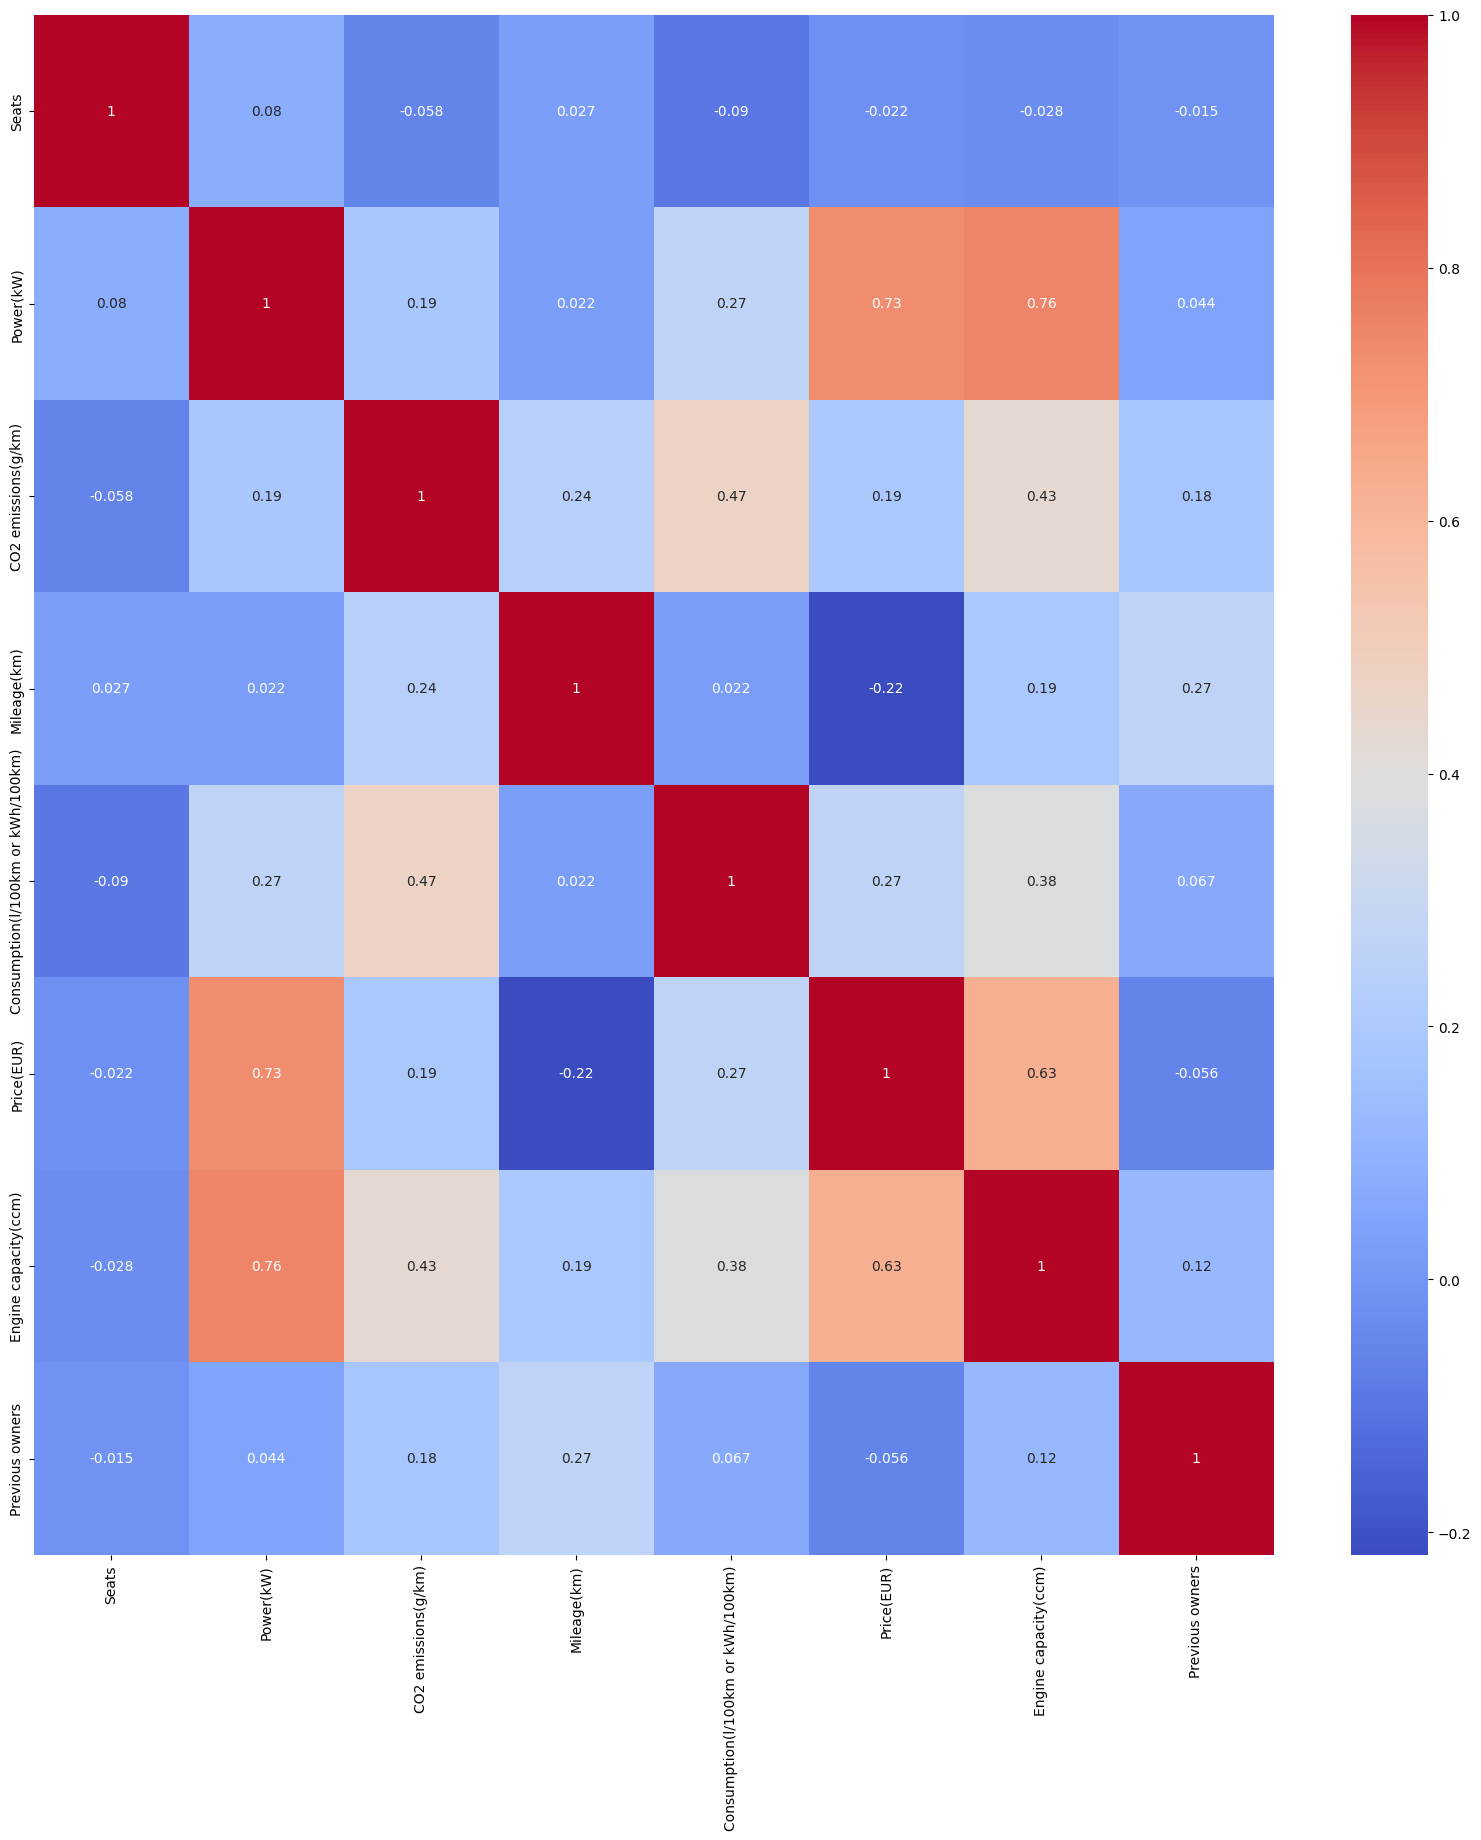

In [5]:

corr_matrix = df_copy.corr()

plt.figure(figsize = (20, 20))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', cbar = True)
plt.show()

### **Question 01:** How does the correlation between different vehicle specifications vary across the top 10 cars with the highest price(EUR)?

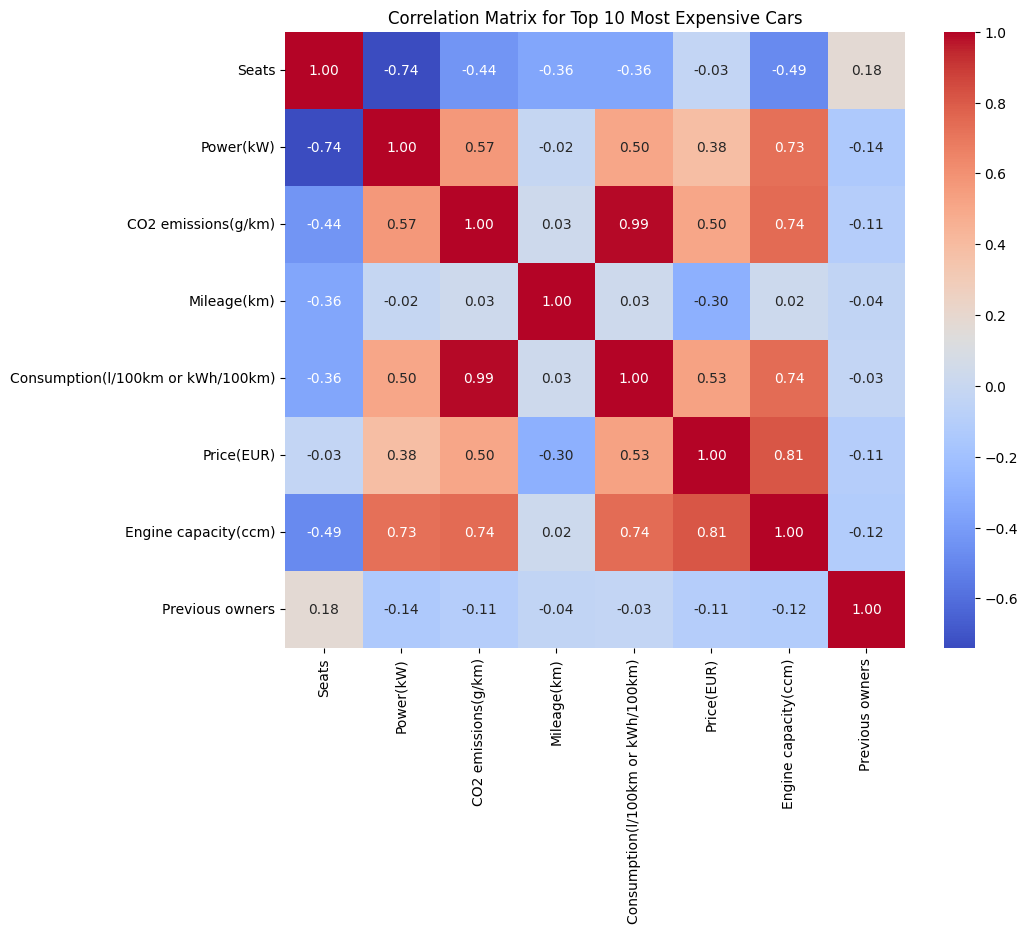

In [6]:
# Chọn ra 10 xe có giá cao nhất
top_10_expensive_cars = data.nlargest(10, 'Price(EUR)')

# Chọn tất cả các cột chứa thông số chi tiết của xe ở dạng numeric
vehicle_specifications = top_10_expensive_cars.select_dtypes(include=np.number)
vehicle_specifications = vehicle_specifications.drop(['ID'],axis=1)
# Tính ma trận tương quan
correlation_matrix = vehicle_specifications.corr()

# Vẽ heatmap cho ma trận tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Top 10 Most Expensive Cars")
plt.show()

**Comment:**

- ID và các thuộc tính khác: Mối tương quan giữa ID và các thuộc tính khác không rõ ràng, có thể do ID không phản ánh bất kỳ đặc tính nào của xe mà chỉ là một nhãn định danh.
- Số ghế (Seats): Có một mối tương quan âm mạnh (-0.74) giữa số ghế và công suất (Power), có thể suy luận rằng những xe có công suất lớn hơn thường có ít ghế hơn. Cũng có một mối tương quan âm với dung tích động cơ (-0.49), có thể những chiếc xe có ít ghế hơn thường là những mẫu xe thể thao hoặc hiệu suất cao với động cơ lớn hơn.
- Công suất (Power): Có mối tương quan dương mạnh với lượng phát thải CO2 (0.57), điều này cho thấy xe có công suất cao thường phát thải nhiều CO2 hơn.
- Phát thải CO2 (CO2 emissions): Có tương quan dương mạnh (1.00) với chính nó như mong đợi, và các mối tương quan khác không quá đáng kể.
- Bảo hành pin (Battery warranty) và Dung lượng pin (Battery capacity): Không có dữ liệu để đánh giá mối tương quan.
- Quãng đường đi được (Mileage): Có một mối tương quan dương mạnh (1.00) với chính nó và một tương quan âm nhẹ với giá xe (-0.30), có thể cho thấy rằng những xe đi được quãng đường dài hơn có xu hướng có giá thấp hơn.
- Giá cả (Price): Ngoài mối tương quan dương với dung tích động cơ (0.81), giá cả cũng có mối tương quan âm nhẹ với số ghế (-0.30), có thể giả định xe đắt tiền có thể ít ghế hơn, như những mẫu xe thể thao cao cấp.
- Dung tích động cơ (Engine capacity): Có mối tương quan dương với công suất (0.73) và phát thải CO2 (0.74), cho thấy những xe có động cơ lớn hơn thường mạnh mẽ và phát thải nhiều hơn.
- Số chủ sở hữu trước đó (Previous owners): Có rất ít tương quan đáng chú ý với các thuộc tính khác.
- Trọng lượng (Weight): Có mối tương quan dương (1.00) với chính nó, nhưng không có mối tương quan mạnh với các thuộc tính khác.

### **Question 02:** How does the mileage (km) vary concerning the number of previous owners, fuel type for cars which is used in the dataset?

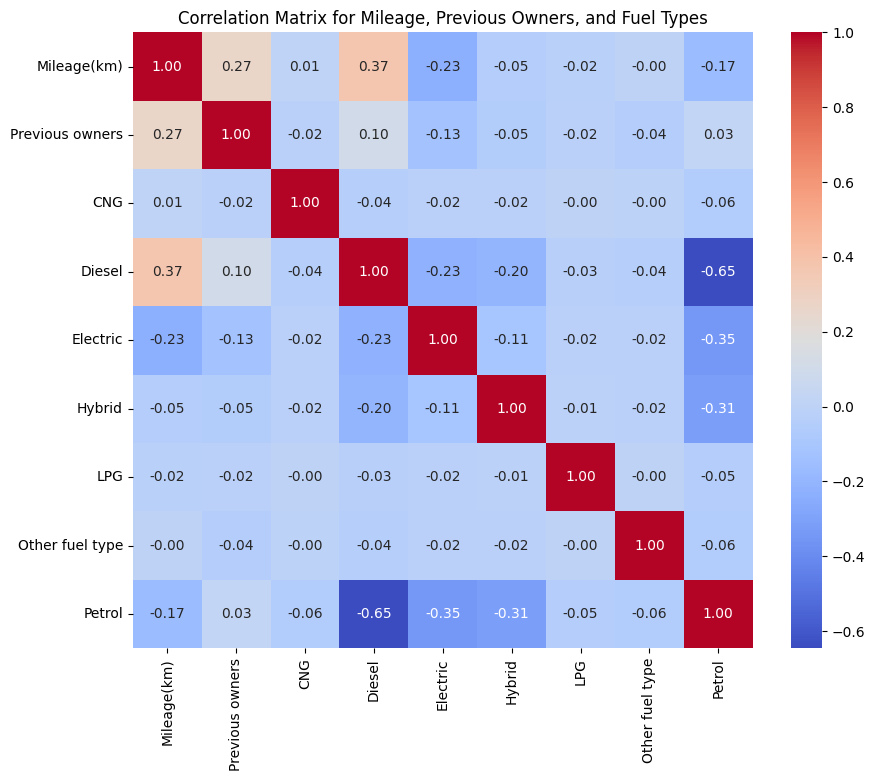

In [7]:
# Tạo một bản sao của clean_df
copy1_df = data.copy()

# Thực hiện One-Hot Encoding cho cột 'Fuel'
encoded_fuel = pd.get_dummies(copy1_df['Fuel'])

# Thêm các cột mã hóa vào DataFrame copy1_df
copy1_df = pd.concat([copy1_df, encoded_fuel], axis=1)

# Xóa cột 'Fuel' gốc vì đã được mã hóa thành các cột mới
copy1_df.drop('Fuel', axis=1, inplace=True)

# Tương tự, thực hiện xử lý cho các cột 'Consumption' và 'First registration'

# Chọn các cột quan tâm, bao gồm cả các cột đã mã hóa
columns_of_interest = ['Mileage(km)', 'Previous owners'] + list(encoded_fuel.columns)

# Tạo DataFrame mới từ các cột quan tâm
data_of_interest = copy1_df[columns_of_interest]

# Tính ma trận tương quan
correlation_matrix = data_of_interest.corr()

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Mileage, Previous Owners, and Fuel Types")
plt.show()

**Comment:**

- Mileage và Diesel: Có một tương quan tích cực mạnh (0.37) giữa quãng đường đi được và xe chạy bằng diesel, điều này có thể cho thấy rằng xe diesel thường được sử dụng cho các quãng đường dài hoặc có tuổi đời xe cao hơn.

- Petrol và Diesel: Có một tương quan âm mạnh (-0.65) giữa xe chạy bằng xăng và diesel, điều này có thể phản ánh việc người tiêu dùng có xu hướng chọn một trong hai loại nhiên liệu này khi mua xe, chứ không phải cả hai.

- Electric và Mileage: Có một mối quan hệ tiêu cực nhẹ (-0.23) giữa xe điện và quãng đường đi được, có thể phản ánh việc xe điện mới được sử dụng nhiều và/hoặc chủ yếu được sử dụng trong đô thị với quãng đường ngắn hơn.

- Hybrid và Other Fuel Types: Mối quan hệ âm nhẹ (-0.20) giữa xe hybrid và loại nhiên liệu khác có thể cho thấy rằng xe hybrid ít có khả năng sử dụng loại nhiên liệu không phải là xăng hoặc điện.

- LPG và Other Fuel Types: Cả hai loại nhiên liệu này đều có mối quan hệ rất yếu với các thuộc tính khác, điều này có thể cho thấy rằng chúng không phổ biến hoặc không đặc biệt liên quan đến quãng đường xe đã đi hoặc số lượng chủ sở hữu trước.

## 3.1.3 Some questions to explore relationship between variables

### **Question 1:** What is the average power of vehicles for each fuel type?

In [8]:
# Tính trung bình công suất cho từng loại nhiên liệu
average_power_by_fuel = data.groupby('Fuel')['Power(kW)'].mean().reset_index()

# Biểu đồ cột hiển thị trung bình công suất theo loại nhiên liệu
fig = px.bar(average_power_by_fuel, x='Fuel', y='Power(kW)', title='Average Power by Fuel Type')
fig.update_xaxes(categoryorder='total descending')  # Sắp xếp loại nhiên liệu theo thứ tự giảm dần của công suất trung bình
fig.show()

**Comment:**
- Xe sử dụng điện (Electric) có công suất trung bình cao nhất so với các loại nhiên liệu khác, được thể hiện qua cột cao nhất trên biểu đồ. Điều này phản ánh khả năng xe điện có thể cung cấp công suất lớn ngay từ lúc khởi động.

- Xe sử dụng hybrid có công suất trung bình xếp thứ hai, thấp hơn so với xe điện nhưng vẫn cao hơn so với các loại nhiên liệu truyền thống khác.

- Xe sử dụng Diesel và Petrol (xăng) có công suất tương tự nhau và nằm ở mức trung bình trong số các loại nhiên liệu được so sánh. Điều này phản ánh việc cả hai loại nhiên liệu này đều được sử dụng rộng rãi trong các loại xe hơi hiện đại.

- Loại "Other fuel type" có công suất thấp hơn so với Diesel và Petrol, có thể bao gồm các loại nhiên liệu thay thế khác không được liệt kê riêng.

- CNG và LPG có công suất trung bình thấp nhất, được thể hiện qua các cột thấp nhất trong biểu đồ, điều này có thể phản ánh sự ít phổ biến của chúng trong các dòng xe có công suất cao hoặc có thể đây là các loại xe tiết kiệm nhiên liệu với mục đích sử dụng khác.


### **Question 2:** How does the engine capacity and power relate to CO2 emissions?

In [9]:
# Biểu đồ scatter plot để quan sát mối quan hệ giữa công suất, dung tích động cơ và CO2 emission
fig = px.scatter(data, x='Engine capacity(ccm)', y='Power(kW)', color='CO2 emissions(g/km)',
                 title='Relationship between Engine Capacity, Power, and CO2 Emissions')
fig.show()

**Comment:**
- Dung tích động cơ và công suất: Có vẻ như có một xu hướng tăng công suất khi dung tích động cơ tăng lên, điều này được thể hiện qua việc các điểm có xu hướng di chuyển lên cao hơn trên trục công suất khi dung tích động cơ lớn hơn.

- Phát thải CO2 và dung tích động cơ: Trong khi không có một xu hướng rõ ràng cho tất cả các điểm, có thể thấy rằng một số xe có dung tích động cơ lớn hơn (từ khoảng 3000 ccm trở lên) có màu sắc chuyển dần sang vàng, cho thấy lượng phát thải CO2 có thể cao hơn.

- Phân bố công suất: Phân bố công suất có vẻ khá rộng lớn, với phần lớn các xe tập trung trong khoảng từ 0 đến khoảng 200 kW. Tuy nhiên, có một số điểm ở mức công suất rất cao, lên tới 800 kW, mà không nhất thiết có dung tích động cơ cực lớn.

- Ngoại lệ: Có một số điểm nằm rất xa so với phần lớn các điểm khác, điều này có thể chỉ ra những xe có đặc tính kỹ thuật rất khác biệt, chẳng hạn như xe thể thao có công suất cao hoặc các xe chuyên dụng.

# 3.2 Using data to anwer meaningful Question

## Question 1: With each price segment, how different are the Power of Electric, Hybrid and traditional fuel cars? 

- Benefits of the question:
    - Helps users easily compare the engine **power** of three **types of vehicles** in the same **price range**.
    - Helps users find a vehicle with the desired power, suitable for their needs.
- How to answer the question by using data?
    - Use a line chart, with the x-axis as price bins and the y-axis as engine power to easily see the difference.

### Step1: Preprocess data to answer the question 

- Due to unique value of the `Fuel` column are: 'Electric', 'Petrol', 'Hybrid', 'Diesel', 'LPG', 'CNG' and 'Other fuel type'. We only care about 
the Fuel type Electric, Hybrid and Fossil Fuel, so
    - I will drop any car that has 'Other fuel type'.
    - Turn 'Petrol','Diesel', 'LPG', 'CNG' to "Fossil".
- Because the data has outliers (for luxury/hyper sport cars), and the number of these cars is very small, I will handle outliers by removing values outside the 95% confidence interval to avoid losing important information.

In [10]:
Fuel_Info = data[["Price(EUR)","Power(kW)","Fuel"]].copy()


# Turn 'Petrol','Diesel', 'LPG', 'CNG' to "Fossil"
Fuel_Info['Fuel'].replace(['Petrol', 'Diesel', 'LPG', 'CNG'], 'Fossil', inplace=True)

# drop any car that has 'Other fuel type'.
Fuel_Info = Fuel_Info[Fuel_Info['Fuel'] != 'Other fuel type']



# Calculate upper_bound_price, base on 95% confidence interval
lower_bound_price = Fuel_Info['Price(EUR)'].quantile(0.025)
upper_bound_price = Fuel_Info['Price(EUR)'].quantile(0.975)
upper_bound_price = np.floor(upper_bound_price / 10000) * 10000

print (Fuel_Info.Fuel.value_counts()) 
print(upper_bound_price)

Fuel
Fossil      1830
Electric     246
Hybrid       205
Name: count, dtype: int64
100000.0


### Step 2: Visualize with line chart 

- Because the supercars will be excluded from the 95% confidence interval, I will divide the bins into two ranges: 
    - bin1: for values within the confidence interval - representing the majority of cars
    - bin2: for outlier values - representing the expensive cars.

In [11]:
import plotly.graph_objects as go


# Define bins for the two ranges
bins1 = np.arange(10000, upper_bound_price, 10000)
bins2 = np.array([upper_bound_price, np.floor(Fuel_Info["Price(EUR)"].max() / 10000) * 10000  ])

# Combine the two bin arrays
bins = np.concatenate((bins1, bins2))

# Create a new column for price bins
Fuel_Info['Price_bin'] = pd.cut(Fuel_Info['Price(EUR)'], bins=bins)

# Calculate the average power for each fuel type and price bin
average_power = Fuel_Info.groupby(['Fuel', 'Price_bin'])['Power(kW)'].mean().unstack()

# Create the line chart for each fuel type
fig = go.Figure()
for i, fuel_type in enumerate(average_power.index):
    fig.add_trace(go.Scatter(x=[f'{int(left)}-{int(right)}' for left, right in zip(bins[:-1], bins[1:])], 
                             y=average_power.loc[fuel_type], 
                             mode='lines', 
                             name=fuel_type))

fig.update_layout(title='AVG Power for each type of Vehicle in each Price range',
                  xaxis_title='Price (EUR)',
                  yaxis_title='Power (kW)',
                  height = 800,
                  )

fig.show()

**Comment**
- We can see that, in most price ranges (20000 to 80000), Hybrid cars have significantly more engine power than Electric and Fossil fuel cars. 
- In the higher segment (> 80000), Electric cars will have a significant power difference compared to the other two types of cars.


## Question 2: The 6 most common special functions and their impact on average price 

- Benefits of the question:
    - Helps to identify the necessary modern functions of a car.
    - Find out the impact of these functions on the car price, help buyers to consider whether to buy a car with that feature or not.
- How to answer the question by using data?
    - From the `Tags` column which is a multiple value column, separate the functions and perform one-hot encoding.
    - Calculate the average price for cars equipped with that function.

### Step 1: One-hot encoding for the top 6 most frequent special functions 

In [12]:

one_hot_df =  data[["Price(EUR)","Tags"]].copy()

# Get each tag in each multiple value row
tags = one_hot_df['Tags'].str.split('; ', expand=True)

# Stack to make the DataFrame long, then get_dummies and group by index before summing
get_dummy = pd.get_dummies(tags.stack()).groupby(level=0).sum()
# Find the top 5 most frequent tags
top_6_tags = get_dummy.sum().nlargest(6).index
# Select only the top 5 most frequent tags
get_dummy = get_dummy[top_6_tags]
# Join the one-hot encoded DataFrame back to the original DataFrame
one_hot_df = one_hot_df.join(get_dummy)

# Drop the `Tags` because we dont need it anymore
one_hot_df = one_hot_df.drop("Tags",axis=1)


print(one_hot_df.columns)
for tag in top_6_tags:
    print(f"{tag}: {get_dummy[tag].sum()}")

Index(['Price(EUR)', 'Heated front seats', 'LED headlights',
       'Navigation system', 'Apple CarPlay', 'Android auto', 'Bluetooth'],
      dtype='object')
Heated front seats: 1388
LED headlights: 1172
Navigation system: 1076
Apple CarPlay: 1072
Android auto: 984
Bluetooth: 967


### Step 2: Draw a bar chart 


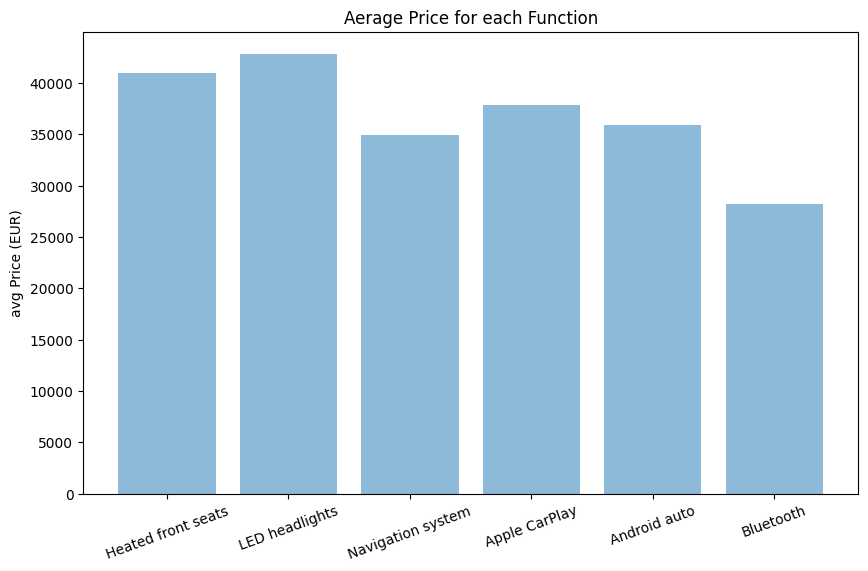

In [13]:
import matplotlib.pyplot as plt

# Calculate the average price for each feature
average_prices = {tag: one_hot_df.loc[one_hot_df[tag] == 1, 'Price(EUR)'].mean() for tag in top_6_tags}

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(average_prices.keys(), average_prices.values(), align='center', alpha=0.5)
plt.xticks(rotation=20)
plt.ylabel('avg Price (EUR)')
plt.title('Aerage Price for each Function')

plt.show()

- We can see that cars equipped with “Heated front seat” and “Led headlights” have a relatively high average price (>= 40000). 
- The average price of cars equipped with “Bluetooth” and “Navigation system” is quite low compared to other equipment, possibly because these features have been around for a long time.
- Finally, cars equipped with “Apple CarPlay” and “Android auto” usually cost from 35000 to under 40000. Due to the popularity of phones, cars with these features are not too expensive to suit many customers.

## Question 3: Is there a significant performance difference among cars at different price ranges?
Looking at the prices, we can observe a substantial difference between the prices of various cars. For example, 75% of the cars are priced below 42k EUR, while the remaining 25% reach up to 600k EUR. This is not a df input error but rather a characteristic of the automotive goods market, where there is significant fluctuation among brands and models.

To analyze whether the price differences correspond to significant performance variations, we can employ the following strategies:

- Benefits of the question:
Answering this question helps clarify whether quality aligns with quantity, addressing the crucial balance between affordability and performance. It aids consumers in making informed decisions, ensuring they acquire products that meet their performance requirements while remaining within their budget.
- How to answer the question by using data?
        - **Boxplot Analysis:** Identify "normal" price ranges and outliers with significantly higher prices using boxplots. Evaluate price distribution within different segments to understand data spread.
        - **Technical Specifications Analysis:** Explore key parameters (horsepower, fuel efficiency, acceleration, etc.)and compare them across price ranges. Create radar charts for visual comparison of performance metrics at different price points.
        - **Additional Technical Parameters:** Analyze seating capacity, vehicle type, etc., to understand trends among different car types at distinct price levels.

Firstly, we need to observe the distribution of cars based on price to divide them into appropriate price ranges. We will use a boxplot to visualize the distribution of cars according to their prices.

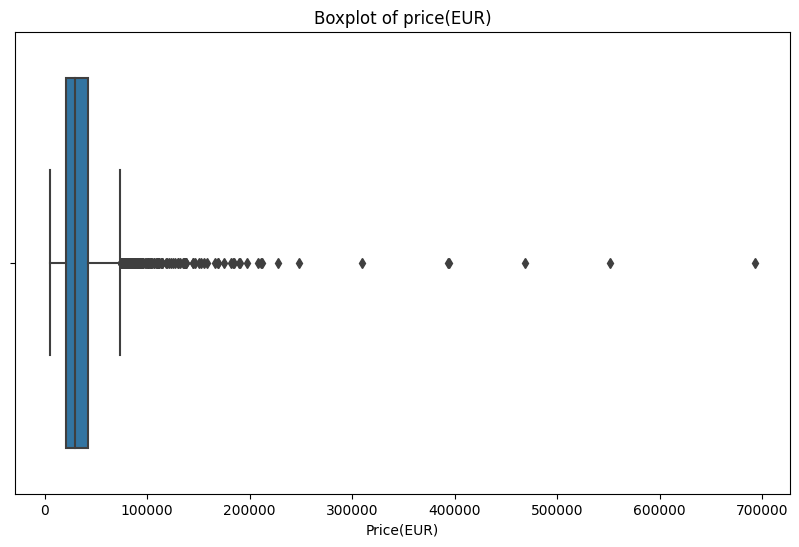

In [14]:
#Vẽ boxplot bằng matplotlib cho cột price(EUR)
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Price(EUR)'])
plt.title('Boxplot of price(EUR)')
plt.show()

From the results above, it is evident that there is a significant difference between the price ranges. We will categorize the data into three subsets:

- Normal price range: 0 - 70k EUR
- Due to substantial outliers, further categorization will be done:
  - High price range: 70k - 150k EUR
  - Very high price range: greater than 150k EUR

In [15]:
df = data.copy()

# Tạo cột mới Type để phân loại giá tiền
threshold_1 = 70000
threshold_2 = 150000
df['Type'] = 'Normal'
df.loc[(df['Price(EUR)'] > threshold_1 ) & (df['Price(EUR)'] < threshold_2), 'Type'] = 'Expensive'

df.loc[df['Price(EUR)'] >= threshold_2, 'Type'] = 'Very Expensive'


# rút gọn tên cột để dễ nhìn
df = df.rename(columns={
    'Power(kW)': 'Power',
    'Consumption(l/100km or kWh/100km)': 'Consumption',
    'CO2 emissions(g/km)': 'CO2 Emissions',
    'Mileage(km)': 'Mileage',
    'Engine capacity(ccm)': 'Engine Capacity'
})


After categorization, we will begin calculating the average performance of cars within each group and visualize the results on a chart.

In [16]:
from sklearn.preprocessing import MinMaxScaler

# Chọn ra các cột thuộc tính sẽ nhận xét
selected_columns = ['Power', 'Consumption', 'CO2 Emissions', 'Mileage', 'Engine Capacity']

# Tính giá trị trung bình cho mỗi loại xe
average_data = df.groupby('Type')[selected_columns].mean().reset_index()

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
average_data[selected_columns] = scaler.fit_transform(average_data[selected_columns]) + 0.1 # +0.1 để tránh trường hợp giá trị = 0


# Tạo biểu đồ radar
fig = go.Figure()

for i, row in average_data.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=row[selected_columns].values.tolist(),
        theta=selected_columns,
        fill='toself',
        name=row['Type']
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1.1]
        )),
    showlegend=True
)

fig.show()


Comment:




Next, we will analyze additional parameters to examine the distribution trends of cars within different groups.

In [17]:
columns = ["Seats", "Fuel", "Transmission", "Condition"]

for column in columns:
    # Tạo danh sách các nhóm và các nhãn
    groups = df['Type'].unique()
    labels = df[column].unique()

    # Tạo một biểu đồ cột nhóm
    fig = go.Figure()

    # Vẽ từng cột cho mỗi nhóm
    for i, group in enumerate(groups):
        # Lọc dữ liệu cho mỗi nhóm
        group_data = df[df['Type'] == group]
        
        # Tính toán phần trăm cho mỗi nhãn trong nhóm
        percentages = [group_data[group_data[column] == label].shape[0] / group_data.shape[0] * 100 for label in labels]
        
        # Vẽ cột
        fig.add_trace(go.Bar(
            x=labels, 
            y=percentages, 
            name=str(group),
        ))

    # Đặt nhãn cho các trục và biểu đồ
    fig.update_layout(barmode='group', xaxis_title=column, yaxis_title='Percentage (%)', title=f'Group Bar Chart for {column}')

    # Hiển thị biểu đồ
    fig.show()


cmt

## Question 4: Is there a correlation between the selling price and the features (tags) of cars? Which features significantly impact the selling price of a car?

- Benefits of answering the question:
    - Understanding the correlation between the selling price and features of used cars can provide valuable insights for buyers and sellers in the market.
    - Identifying the features that significantly impact the selling price can help sellers determine the optimal pricing strategy for their used cars.
    - The code provided offers a step-by-step process to analyze the data and generate visualizations, making it easy to replicate and apply to different datasets.
- Implementation steps:

### Step 1: Prepare the data
- Select the top 10 highest-priced and lowest-priced cars and store them in separate variables.

In [18]:
top_10_high_price = data.nlargest(10, "Price(EUR)")  # Filter out the top 10 cars with the highest prices
top_10_low_price = data.nsmallest(10, "Price(EUR)")  # Filter out the top 10 cars with the lowest prices

### Step 2: Data preprocessing
- Create a function to one-hot encode the tags and apply it to the selected cars dataset.

In [19]:
# Bước 2: Tiền xử lý dữ liệu
def one_hot_encode_tags(data):
    # Create a copy of the original DataFrame
    one_hot_df = data[["Price(EUR)","Tags"]].copy()
    
    # Get each tag in each multiple value row
    tags = one_hot_df['Tags'].str.split('; ', expand=True)
    
    # Stack to make the DataFrame long, then get_dummies and group by index before summing
    get_dummy = pd.get_dummies(tags.stack()).groupby(level=0).sum()
    
    # Join the one-hot encoded DataFrame back to the original DataFrame
    one_hot_df = one_hot_df.join(get_dummy)
    
    # Drop the `Tags` column
    one_hot_df = one_hot_df.drop("Tags", axis=1)
    
    return one_hot_df

# Bước 2: Tiền xử lý dữ liệu
top_10_high_price = one_hot_encode_tags(top_10_high_price)
top_10_low_price = one_hot_encode_tags(top_10_low_price)




### Step 3: Calculate correlation and visualize
- Calculate the correlation matrix for the features and selling price of the high-priced and low-priced cars. Sort the correlation coefficients and select the top 10 tags. Create horizontal bar charts to visualize the correlations.

In [20]:
top_10_tags_high_prices = top_10_high_price.columns[1:]  # Exclude the "Price(EUR)" column
top_10_tags_low_prices = top_10_low_price.columns[1:]  # Exclude the "Price(EUR)" column

corr_matrix_high_prices = top_10_high_price.corr()
corr_matrix_low_prices = top_10_low_price.corr()

sorted_corr_high_prices = corr_matrix_high_prices['Price(EUR)'].sort_values(ascending=False)
sorted_corr_low_prices = corr_matrix_low_prices['Price(EUR)'].sort_values(ascending=False)

bar_chart_high_prices = go.Bar(
    x=sorted_corr_high_prices[1:11],
    y=top_10_tags_high_prices,
    orientation='h',
    marker=dict(
        color='cornflowerblue'
    ),
    text=sorted_corr_high_prices[1:11].round(2),  # Add correlation coefficients as text labels
    textposition='inside',  # Position the text labels inside the bars
    name='Highest Prices'  # Set the name for the bar chart
)

# Bước 7: Tạo biểu đồ thanh ngang cho top 10 tags có hệ số tương quan cao nhất - Giá thấp nhất
bar_chart_low_prices = go.Bar(
    x=sorted_corr_low_prices[1:11],
    y=top_10_tags_low_prices,
    orientation='h',
    marker=dict(
        color='pink'
    ),
    text=sorted_corr_low_prices[1:11].round(2),  # Add correlation coefficients as text labels
    textposition='inside',  # Position the text labels inside the bars
    name='Lowest Prices'  # Set the name for the bar chart
)

# Create a figure with subplots
fig = make_subplots(rows=2, cols=1, shared_xaxes=True)

# Add the bar charts to the figure
fig.add_trace(bar_chart_high_prices, row=1, col=1)
fig.add_trace(bar_chart_low_prices, row=2, col=1)

# Customize the layout
fig.update_layout(
    title='Top 10 Tags with Highest Correlation Coefficients',
    xaxis_title='Correlation Coefficient',
    yaxis_title='Tags',
    height=800  # Increase the height of the plot to accommodate all y-axis labels
)

# Show the plot
fig.show()

- As the plot shows, the features with the highest correlation coefficients with highest car prices are:
    - Driver's seat with massage function (correlation coefficient: 0.7)
    - Air suspension (correlation coefficient: 0.37)
    - Adaptive cruise control (correlation coefficient: 0.4)
    - Ventilated front seats (correlation coefficient: 0.42)
    - Keyless entry (correlation coefficient: 0.49)
    - Heated front seats (correlation coefficient: 0.51)
    - Digital cockpit (correlation coefficient: 0.51)
    - Heated rear seats (correlation coefficient: 0.29)
    - Panoramic roof (correlation coefficient: 0.21)
- These features can be considered luxury features, and their presence is associated with higher car prices. This is because these features are considered to be more comfortable or safe, and car buyers are willing to pay more for them.

- In addition, the plot also shows that the features with the highest correlation coefficients with lowest car prices are:
    - Keyless ignition (correlation coefficient: 0.24)
    - Keyless entry (correlation coefficient: 0.24)
    - Heated front seats (correlation coefficient: 0.24)
    - Rain sensor (correlation coefficient: 0.26)
    - Light sensor (correlation coefficient: 0.26)Voice control (correlation coefficient: 0.27)
    - Bose audio (correlation coefficient: 0.27)
    - Panoramic roof (correlation coefficient: 0.3)
    - Alarm (correlation coefficient: 0.3)
    - Hill-start assist (correlation coefficient: 0.48)
- These features can be considered basic features. This is because these features are considered to be necessary for safe and comfortable driving, and car buyers are not willing to pay more for them.

## Question 5: How do CO2 emissions (g/km) and fuel consumption vary among different vehicle body types and fuel types?
- Benefits of question:
    - Helps users see the difference between choosing environmentally friendly vehicles and types of vehicles that are more likely to cause environmental pollution
    - Helps users choose environmentally friendly vehicles, contributing to environmental protection.
- How to answer the question by using data?
    - Use bar charts to illustrate the variations across different vehicle body and fuel types.

### Step1: Preprocess data to answer the question
- Group vehicles by body types and fuel types
- Calculate the average CO2 emissions and fuel consumption for each group

In [21]:
copydata = data.copy()

# Grouping by Body and Fuel types and calculating mean emissions and consumption
grouped_data = copydata.groupby(['Body', 'Fuel']).agg({'CO2 emissions(g/km)': 'mean', 'Consumption(l/100km or kWh/100km)': 'mean'})
# print(grouped_data)


### Step 2: Draw a bar chart 

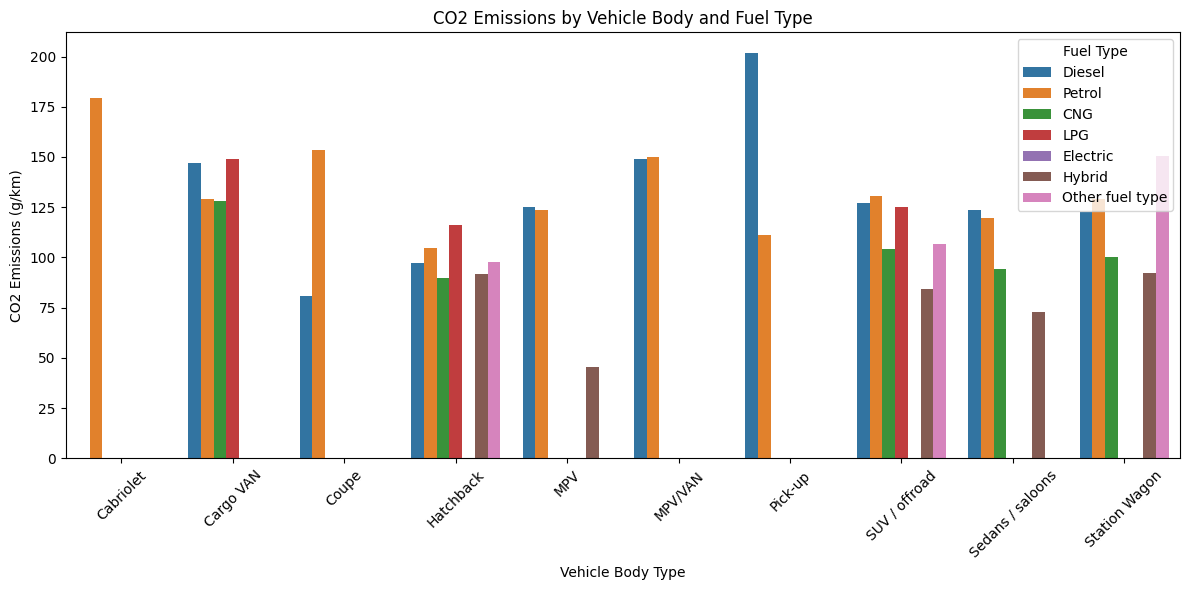

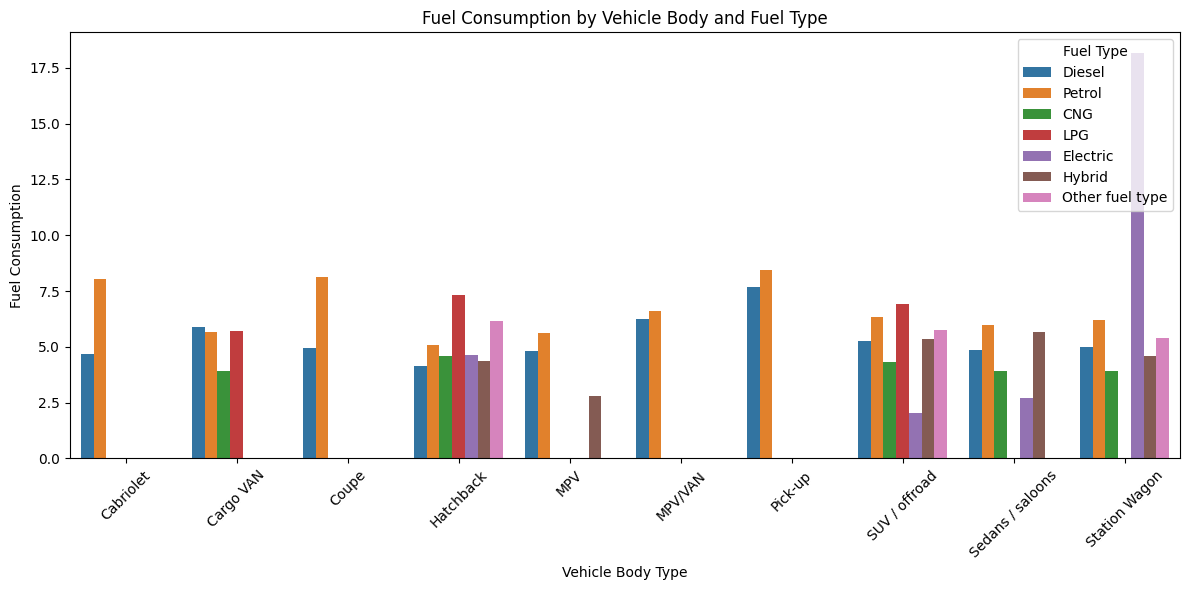

In [22]:
# Reset index to make 'Body' and 'Fuel' columns accessible for plotting
grouped_data = grouped_data.reset_index()

# Plotting CO2 emissions by body and fuel type
plt.figure(figsize=(12, 6))
sns.barplot(x='Body', y='CO2 emissions(g/km)', hue='Fuel', data=grouped_data)
plt.title('CO2 Emissions by Vehicle Body and Fuel Type')
plt.xlabel('Vehicle Body Type')
plt.ylabel('CO2 Emissions (g/km)')
plt.xticks(rotation=45)
plt.legend(title='Fuel Type')
plt.tight_layout()
plt.show()

# Plotting fuel consumption by body and fuel type
plt.figure(figsize=(12, 6))
sns.barplot(x='Body', y='Consumption(l/100km or kWh/100km)', hue='Fuel', data=grouped_data)
plt.title('Fuel Consumption by Vehicle Body and Fuel Type')
plt.xlabel('Vehicle Body Type')
plt.ylabel('Fuel Consumption')
plt.xticks(rotation=45)
plt.legend(title='Fuel Type')
plt.tight_layout()
plt.show()


**Comment:**
- SUV Offroad và Pickup có lượng khí thải CO2 và mức tiêu thụ nhiên liệu cao so với các loại xe khác.
- Các xe chạy bằng điện có lượng khí thải CO2 rất thấp và mức tiêu thụ nhiên liệu thấp, điều này phản ánh hiệu quả năng lượng và tác động môi trường thấp hơn của chúng so với các xe sử dụng nhiên liệu hóa thạch.
- Hybrid và Electric vehicles (xe hybrid và xe electric) nổi bật với mức khí thải thấp và hiệu quả năng lượng cao trên cả hai biểu đồ.

## Question 6: How do the average price, consumption, and mileage vary across different power groups for petrol and diesel cars?
- Benefits of question:
    - Helps car buyers gain an overall perspective on the performance of different petrol and diesel cars across various power categories.
    - Helps users find a powerful yet cost-effective vehicle
- How to answer the question by using data?
    - Use lines chart include 6 lines to visualize each variable for comparing both petrol and diesel.

### Step 1: Preprocess data to answer the question
- Filter the cars using petrol or diesel
- Grouping by power (Power) and calculating average values for each fuel type

In [23]:
copy_data = data.copy()

# Create a new column 'Fuel_Type' to specify the fuel as Petrol/Diesel
copy_data['Fuel_Type'] = np.where(copy_data['Fuel'].isin(['Petrol', 'Diesel']), copy_data['Fuel'], 'Other')

# Grouping by power (Power) and calculating average values for each fuel type
max_power = copy_data['Power(kW)'].max()
power_bins = np.arange(0, max_power + 50, 50)
copy_data['Power_Group'] = pd.cut(copy_data['Power(kW)'], bins=power_bins)

# Calculating the average values for each fuel type and power groupT
grouped_power_stats = copy_data.groupby(['Fuel_Type', 'Power_Group']).agg({
    'Price(EUR)': 'mean',
    'Consumption(l/100km or kWh/100km)': 'mean',
    'Mileage(km)': 'mean'
}).reset_index()

### Step 2: Draw a line chart
- 6 lines with different colors representing Petrol and Diesel for Price(EUR), Consumption(l/100km or kWh/100km), Mileage(km)

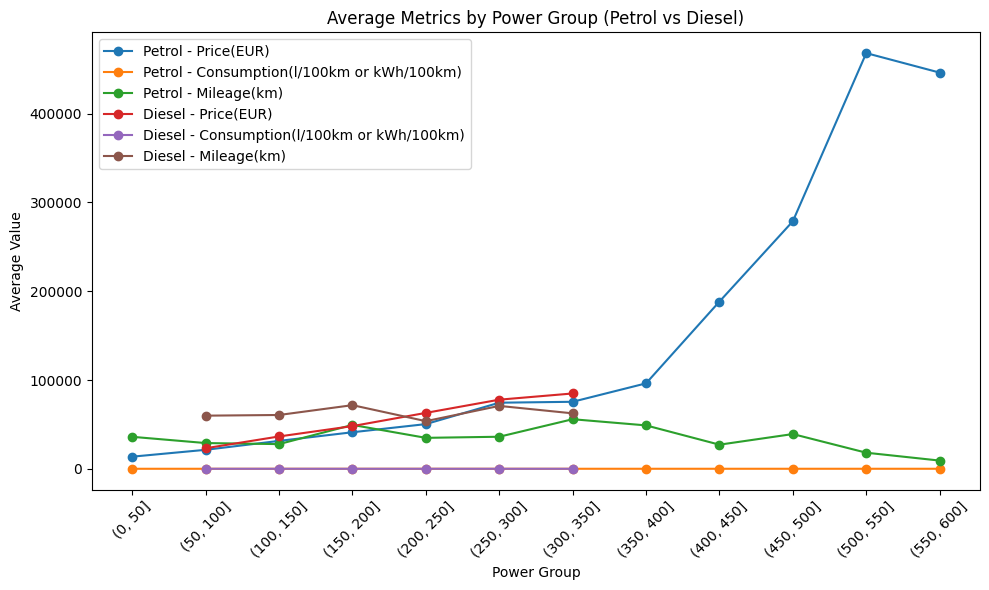

In [24]:
# Vẽ biểu đồ đường
plt.figure(figsize=(10, 6))

for fuel_type in ['Petrol', 'Diesel']:
    fuel_data = grouped_power_stats[grouped_power_stats['Fuel_Type'] == fuel_type]
    for metric in ['Price(EUR)', 'Consumption(l/100km or kWh/100km)', 'Mileage(km)']:
        plt.plot(fuel_data['Power_Group'].astype(str), fuel_data[metric], marker='o', label=f'{fuel_type} - {metric}')

plt.title('Average Metrics by Power Group (Petrol vs Diesel)')
plt.xlabel('Power Group')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


**Comment:**
- Xe chạy bằng xăng có giá trị trung bình giá cao nhất trong nhóm công suất cao nhất (550 - 600], và giá trị này tăng đáng kể so với các nhóm công suất khác.
- Tiêu thụ nhiên liệu của xe chạy bằng xăng cũng tăng lên đáng kể trong nhóm công suất cao nhất, cho thấy rằng xe càng mạnh thì càng tiêu thụ nhiều nhiên liệu hơn.
- Mileage(km) của cả xe xăng lẫn diesel có vẻ như ổn định xuyên suốt các nhóm công suất, không có sự tăng giảm đáng kể nào.
- Giá trị tiêu thụ nhiên liệu của xe diesel không thay đổi nhiều giữa các nhóm công suất và luôn thấp hơn so với xe chạy bằng xăng.
- Giá trị giá cả của xe diesel có sự tăng nhẹ nhưng không đột ngột như xe chạy bằng xăng trong nhóm công suất cao nhất.